#### Step 1: Data Fetching & Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking

In [ ]:
# Create dataset for shoot data
Shoot_list = [
    # './content/D_shoot1.txt',
    './content/D_shoot2.txt', './content/D_shoot3.txt', './content/D_shoot4.txt', './content/D_shoot5.txt',
    # './content/Jc_shoot1.txt',
    './content/Jc_shoot2.txt', './content/Jc_shoot3.txt', './content/Jc_shoot4.txt', './content/Jc_shoot5.txt',
    './content/L_shoot1.txt', './content/L_shoot2.txt', './content/L_shoot3.txt', './content/L_shoot4.txt', './content/L_shoot5.txt',
    './content/X_shoot1.txt', './content/X_shoot2.txt', './content/X_shoot3.txt'
]

dataframes = []
for file in Shoot_list:
    df = pd.read_csv(file, skiprows=3)
    dataframes.append(df)
combined_shoot_data = pd.concat(dataframes, ignore_index=True)
combined_shoot_data["Class_shoot"] = "Yes" # For shoot
combined_shoot_data.head()

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Class_shoot
0,0.000000,6.846220,6.313510,-2.704251,9.697634,106.191986,42.681915,Yes
1,0.010018,6.617573,6.139930,-2.742558,9.434650,106.899269,42.855839,Yes
2,0.019932,6.695385,6.197391,-2.576161,9.480107,105.768066,42.788006,Yes
3,0.030004,7.155072,6.287174,-2.069787,9.747186,102.259941,41.305828,Yes
4,0.039963,7.583634,6.376956,-0.810437,9.941524,94.675964,40.059944,Yes


In [ ]:
combined_shoot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time (s)      6291 non-null   float64
 1    X (m/s2)     6291 non-null   float64
 2    Y (m/s2)     6291 non-null   float64
 3    Z (m/s2)     6291 non-null   float64
 4    R (m/s2)     6291 non-null   float64
 5    Theta (deg)  6291 non-null   float64
 6    Phi (deg)    6291 non-null   float64
 7   Class_shoot   6291 non-null   object 
dtypes: float64(7), object(1)
memory usage: 393.3+ KB


In [ ]:
# Create dataset for no shoot data
no_shoot_files = [
    './content/D_dribble1.txt',
    './content/D_dribble2.txt', './content/D_dribble3.txt',
    # './content/Jc_dribble1.txt',
    './content/Jc_dribble2.txt', './content/Jc_dribble3.txt',
    './content/L_dribble1.txt', './content/L_dribble2.txt', './content/L_dribble3.txt',
    './content/X_dribble1.txt', './content/X_dribble2.txt', './content/X_dribble3.txt',
]
no_shoot_dataframes = []
for file in no_shoot_files:
    df = pd.read_csv(file, skiprows=3)
    no_shoot_dataframes.append(df)
combined_no_shoot_data = pd.concat(no_shoot_dataframes, ignore_index=True)
combined_no_shoot_data["Class_shoot"] = "No" # For no shoot
combined_no_shoot_data.head()

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Class_shoot
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287,No
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172,No
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811,No
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748,No
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809,No


In [ ]:
combined_no_shoot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time (s)      11756 non-null  float64
 1    X (m/s2)     11756 non-null  float64
 2    Y (m/s2)     11756 non-null  float64
 3    Z (m/s2)     11756 non-null  float64
 4    R (m/s2)     11756 non-null  float64
 5    Theta (deg)  11756 non-null  float64
 6    Phi (deg)    11756 non-null  float64
 7   Class_shoot   11756 non-null  object 
dtypes: float64(7), object(1)
memory usage: 734.9+ KB


In [ ]:
# Merge both the dataset
final_data = pd.concat([combined_shoot_data, combined_no_shoot_data], ignore_index=True)
final_data.head()

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),Class_shoot
0,0.000000,6.846220,6.313510,-2.704251,9.697634,106.191986,42.681915,Yes
1,0.010018,6.617573,6.139930,-2.742558,9.434650,106.899269,42.855839,Yes
2,0.019932,6.695385,6.197391,-2.576161,9.480107,105.768066,42.788006,Yes
3,0.030004,7.155072,6.287174,-2.069787,9.747186,102.259941,41.305828,Yes
4,0.039963,7.583634,6.376956,-0.810437,9.941524,94.675964,40.059944,Yes


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18047 entries, 0 to 18046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time (s)      18047 non-null  float64
 1    X (m/s2)     18047 non-null  float64
 2    Y (m/s2)     18047 non-null  float64
 3    Z (m/s2)     18047 non-null  float64
 4    R (m/s2)     18047 non-null  float64
 5    Theta (deg)  18047 non-null  float64
 6    Phi (deg)    18047 non-null  float64
 7   Class_shoot   18047 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
# Cleaning the columns name
print(final_data.columns.tolist())
final_data.columns = final_data.columns.str.strip()
print(final_data.columns.tolist())

['Time (s)', ' X (m/s2)', ' Y (m/s2)', ' Z (m/s2)', ' R (m/s2)', ' Theta (deg)', ' Phi (deg)', 'Class_shoot']
['Time (s)', 'X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)', 'Class_shoot']


#### Step 2: Model Preprocessing & Training


In [ ]:
# Define parameters
sequence_length = 3   # Sliding window size
step = 1              # Sliding window step
sequences = []
labels = []
for class_label, group in final_data.groupby('Class_shoot'):
    values = group[['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']].values
    for start in range(0, len(values) - sequence_length + 1, step):
        end = start + sequence_length
        sequences.append(values[start:end])
        labels.append(class_label)
X = np.array(sequences)
y = np.array(labels)
print(f'Sequences shape: {X.shape}, Labels shape: {y.shape}')

Sequences shape: (18043, 3, 6), Labels shape: (18043,)


In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
print(f'Train sequences: {X_train.shape}, Test sequences: {X_test.shape}')

Train sequences: (12630, 3, 6), Test sequences: (5413, 3, 6)


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

# Define the updated LSTM model with Conv1D
model = Sequential()
# Add a 1D convolutional layer to extract local features
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# Optionally add a max-pooling layer
model.add(MaxPooling1D(pool_size=1))

# Add Masking layer
model.add(Masking(mask_value=0.))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.5))

# Add Dense layers for classification
model.add(Dense(25, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ masking_1 (Masking)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,543 (99.78 KB)

 Trainable params: 25,543 (99.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7233 - loss: 0.5799 - val_accuracy: 0.7609 - val_loss: 0.5328
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7686 - loss: 0.5313 - val_accuracy: 0.7706 - val_loss: 0.5231
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7656 - loss: 0.5266 - val_accuracy: 0.7682 - val_loss: 0.5208
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7724 - loss: 0.5119 - val_accuracy: 0.7696 - val_loss: 0.5132
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7724 - loss: 0.5137 - val_accuracy: 0.7706 - val_loss: 0.5045
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7726 - loss: 0.5044 - val_accuracy: 0.7707 - val_loss: 0.5118
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7699 - loss: 0.4961 - val_accuracy: 0.7728 - val_loss: 0.4997
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7736 - loss: 0.4800 - val_accuracy: 0

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4056
Test Accuracy: 0.8103


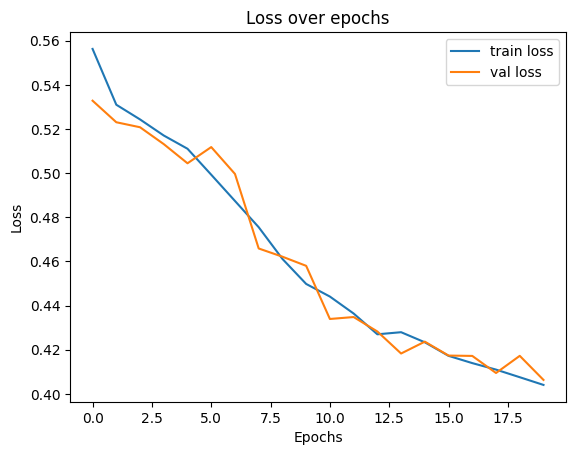

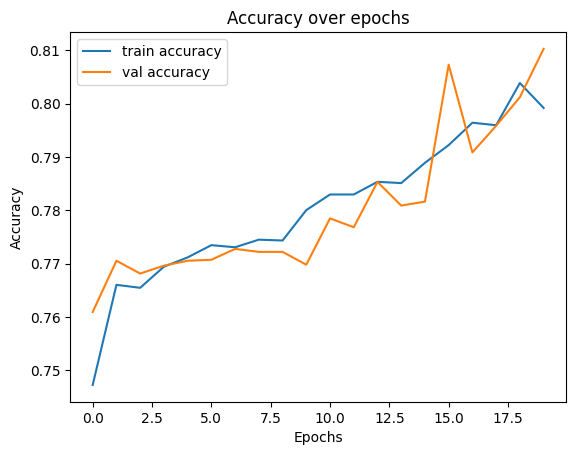

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Loss Plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Accuracy Plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()




```
`# This is formatted as code`
```

#### Step 3: Model Testing & Inferencing


In [ ]:
# Make predictions
print(f'Test Sequences shape: {X_test.shape}, Test Labels shape: {y_test.shape}')
predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)
actual_labels = label_encoder.inverse_transform(y_test)
comparison_df = pd.DataFrame({
    'Actual Label': actual_labels,
    'Predicted Label': predicted_labels
})
comparison_df.head()

Test Sequences shape: (5413, 3, 6), Test Labels shape: (5413,)
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Actual Label,Predicted Label
0,No,No
1,No,No
2,Yes,No
3,No,Yes
4,No,No


In [ ]:
# Confusion Matrix
cm = confusion_matrix(actual_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Example new data (For No Shoot)
new_data = pd.DataFrame({
    'Time (s)': [0.0, 0.010069, 0.020059, 0.030132, 0.040165, 0.050000, 0.060000, 0.070000, 0.080000, 0.090000, 0.100000],
    'X (m/s2)': [4.927267, 4.859032, 5.304354, 5.923255, 6.259640, 6.488286, 6.558916, 6.561310, 6.578069, 6.862979, 6.424840],
    'Y (m/s2)': [8.297106, 8.064868, 8.016984, 8.039729, 7.984663, 7.987057, 7.963115, 7.936779, 7.571663, 8.434772, 9.130288],
    'Z (m/s2)': [-1.447295, -0.981623, -0.294487, 0.499191, 1.295263, 1.844732, 2.018312, 1.984793, 1.884237, 1.314417, -0.187945],
    'R (m/s2)': [9.757796, 9.466566, 9.617428, 9.998569, 10.228178, 10.454376, 10.512095, 10.487262, 10.205461, 10.953244, 11.165843],
    'Theta (deg)': [98.529694, 95.951904, 91.754677, 87.138245, 82.724716, 79.836632, 78.930534, 79.090546, 79.360428, 83.107750, 90.964455],
    'Phi (deg)': [59.295887, 58.931301, 56.509800, 53.619141, 51.905045, 50.911312, 50.523010, 50.419567, 49.016716, 50.866367, 54.866550]

    })
new_sequences = []
sequence_length = 3  # Same as used for training
new_values = new_data[['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']].values
for start in range(0, len(new_values) - sequence_length + 1):
    end = start + sequence_length
    new_sequences.append(new_values[start:end])
X_new = np.array(new_sequences)
print(f'New Sequences shape: {X_new.shape}')

In [ ]:
# Make predictions
if X_new.shape[0] > 0:
    predictions = model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_labels = label_encoder.inverse_transform(predicted_classes)
    for i, label in enumerate(predicted_labels):
        print(f'Sequence {i + 1}: Predicted Class = {label}')
else:
    print("Not enough data to create sequences for prediction.")

In [ ]:
# Example new data (For Shoot)
new_data = pd.DataFrame({
'Time (s)': [0.000000, 0.009735, 0.019581, 0.029482, 0.039491, 0.049509, 0.059529, 0.069897, 0.079660, 0.089614, 0.099571, 0.109553, 0.119568, 0.129542, 0.139469, 0.149567, 0.159546, 0.169565, 0.179538, 0.189552, 0.199549, 0.209632, 0.219608, 0.229690, 0.239616, 0.249544, 0.259509, 0.269780, 0.279683, 0.289672, 0.299635, 0.309653, 0.319638, 0.329705, 0.339735, 0.350242, 0.360141, 0.369827, 0.379795, 0.389734, 0.399659, 0.409613, 0.419550, 0.429559, 0.439607, 0.449589, 0.459578, 0.469660, 0.479621, 0.489739, 0.499675, 0.509656, 0.519857, 0.529748, 0.539656, 0.549652, 0.559607, 0.569793, 0.579918, 0.589972, 0.599755, 0.609827, 0.619744, 0.629786, 0.639693, 0.649655, 0.659672, 0.669702, 0.680223, 0.690384, 0.699959, 0.709789, 0.719696, 0.729829, 0.739682, 0.749684, 0.759667, 0.769637, 0.780152, 0.790046, 0.800031, 0.809807, 0.819676, 0.829755, 0.839646, 0.849582, 0.859622, 0.869660, 0.879638, 0.889761, 0.899671, 0.909747, 0.919773, 0.929739, 0.939705, 0.949715, 0.959632, 0.969667, 0.979616, 0.989733, 0.999726, 1.009731, 1.019603, 1.029671, 1.039609, 1.049879, 1.059643, 1.069559, 1.079583, 1.089618, 1.099514, 1.109619, 1.119633, 1.129848, 1.139703, 1.149646, 1.159680, 1.169714, 1.179891, 1.189741, 1.199758, 1.210080, 1.219933, 1.229878, 1.239802, 1.249802, 1.259794, 1.269908, 1.279808, 1.289881, 1.299778, 1.309661, 1.319697, 1.329778, 1.339955, 1.349867, 1.359689, 1.369666, 1.379600, 1.389613, 1.399704, 1.409892, 1.419791, 1.429830, 1.439712, 1.449692, 1.459756, 1.469782, 1.479818, 1.490084, 1.499901, 1.509811, 1.519801, 1.529715, 1.539729, 1.549888, 1.559853, 1.569845, 1.579717, 1.589656, 1.599930, 1.609834, 1.619739, 1.630006, 1.640068, 1.649885, 1.659820, 1.669650, 1.679546, 1.689560, 1.699493, 1.709468, 1.719496, 1.729480, 1.739504, 1.749486, 1.759497, 1.769588, 1.779534, 1.789469, 1.799442, 1.809470, 1.819477, 1.829600, 1.839701, 1.849669, 1.859657, 1.869693, 1.879576, 1.889624, 1.899701, 1.909940, 1.919810, 1.929764, 1.939669, 1.949699, 1.959752, 1.970005, 1.979844, 1.989890, 2.000017, 2.010245, 2.019866, 2.029730, 2.039626, 2.049641, 2.059605, 2.069714, 2.079860, 2.090224, 2.099914, 2.109749, 2.120101, 2.129895, 2.139715, 2.149601, 2.159536, 2.169525, 2.179504, 2.189552, 2.199568, 2.209718, 2.219706, 2.229773, 2.239654, 2.249576, 2.259572, 2.269749, 2.279751, 2.289814, 2.299785, 2.309814, 2.319797, 2.329751, 2.339790, 2.349785, 2.359785, 2.369760, 2.379738, 2.389663, 2.399579, 2.409598, 2.419598, 2.429636, 2.439816, 2.449867, 2.459928, 2.469719, 2.479652, 2.489753, 2.499736, 2.509626, 2.519569, 2.529676, 2.539661, 2.549686, 2.559678, 2.569724, 2.579751, 2.589728, 2.599649, 2.609639, 2.619560, 2.629730, 2.639629, 2.649857, 2.659800, 2.669681, 2.679636, 2.689703, 2.699697, 2.709628, 2.719606, 2.729636, 2.739587, 2.749996, 2.759886, 2.769727, 2.779614, 2.789576, 2.799560, 2.809696, 2.819895, 2.829832, 2.839711, 2.849680, 2.859743, 2.869776, 2.879753, 2.889710, 2.899617, 2.909609, 2.919602, 2.929699, 2.939711, 2.949669, 2.959630, 2.969603, 2.979603, 2.989880, 2.999865, 3.009711, 3.019597, 3.029596, 3.039609, 3.049627, 3.059706, 3.069738, 3.079919, 3.089749, 3.099709, 3.109573, 3.119596, 3.129595, 3.140896, 3.150184, 3.159849, 3.169660, 3.180169, 3.189949, 3.199828, 3.209997, 3.219755, 3.230007, 3.239988, 3.249872, 3.259718, 3.269654, 3.279591, 3.289692, 3.300056, 3.310350, 3.319963, 3.329777, 3.339726, 3.349701, 3.360041, 3.369990, 3.379765, 3.389771, 3.400226, 3.410952, 3.420353, 3.430195, 3.440022, 3.450049, 3.459789, 3.469705, 3.479651, 3.489692, 3.499667, 3.509754, 3.519715, 3.529624, 3.539601],
'X (m/s2)': [2.158373, 2.427721, 3.039439, 3.436877, 3.566164, 3.562572, 3.361459, 3.386598, 3.754108, 4.060566, 4.531027, 5.489904, 6.453571, 6.974309, 7.291541, 7.217321, 6.664260, 5.687426, 4.471172, 2.758120, 1.671153, 1.229423, 1.144428, 1.964442, 4.013879, 4.946421, 5.298368, 5.100847, 4.534618, 3.424906, 3.150769, 2.998738, 2.922123, 2.875436, 2.902970, 3.046622, 3.312378, 3.667917, 4.048595, 4.378995, 4.643554, 4.851850, 5.094861, 5.487510, 5.907693, 6.226121, 6.359000, 6.309918, 6.208165, 6.131551, 6.151901, 6.191406, 6.230910, 6.370971, 6.538565, 6.607996, 6.646304, 6.646304, 6.676231, 6.794744, 6.973113, 7.184999, 7.416040, 7.759608, 8.216900, 8.785523, 9.435549, 10.077195, 10.663774, 11.154586, 11.496957, 11.633426, 11.548432, 11.311406, 10.890026, 9.920375, 9.654618, 9.617508, 9.647436, 9.690532, 9.743204, 9.767146, 9.588778, 9.257181, 8.822633, 8.331821, 7.882909, 7.641095, 7.602787, 7.684190, 7.711724, 7.644686, 7.412448, 7.066486, 6.797139, 6.657078, 6.712144, 6.907272, 7.056910, 7.220912, 7.295133, 7.322666, 7.248446, 7.149086, 6.956353, 6.840234, 6.918046, 7.413646, 8.275558, 9.329007, 10.419566, 11.757924, 13.379996, 15.120581, 16.695965, 17.743429, 18.002003, 17.866730, 17.827227, 18.201918, 19.055450, 20.311211, 19.226637, 17.438168, 15.417461, 14.683639, 15.024813, 15.867572, 16.502035, 16.652870, 16.988058, 17.444153, 17.618931, 18.121712, 18.047493, 15.738285, 11.702858, 7.969100, 2.488773, -7.633912, -15.562311, -19.013554, -29.744366, -35.832821, -21.168335, -6.254852, 3.774459, 10.304645, 10.651803, 6.060922, 2.354697, 1.511938, 2.195483, 3.484761, 5.774815, 7.769185, 8.250419, 7.139510, 5.219360, 3.211822, 1.480814, 0.084994, -0.927753, -1.100136, -0.669179, 0.160412, 1.308431, 2.637213, 3.904943, 6.119579, 7.030573, 7.762002, 8.372523, 8.863335, 9.265560, 9.579201, 10.146626, 10.769119, 11.362882, 11.925519, 12.304999, 12.409147, 12.282255, 12.083536, 11.675324, 11.215638, 10.964247, 11.070788, 11.382035, 11.984177, 12.805387, 13.710396, 14.358027, 14.684836, 14.486117, 14.136564, 13.723564, 12.691663, 11.312603, 10.085575, 9.302670, 8.844181, 8.842984, 8.834604, 8.708909, 8.639477, 8.720880, 8.978256, 9.331401, 9.695320, 9.998186, 10.673351, 11.463438, 12.011710, 11.973403, 10.438720, 9.363723, 8.359355, 7.542933, 7.068881, 7.068881, 7.480683, 8.085219, 8.597578, 8.893262, 8.819042, 8.350976, 7.613562, 6.837840, 6.090849, 5.562928, 5.243302, 5.245696, 5.465962, 5.651513, 5.920861, 6.303933, 6.396110, 5.942409, 5.081693, 4.046201, 3.056198, 2.266112, 1.654393, 1.288081, 1.176750, 1.349133, 1.716643, 2.102109, 2.450465, 2.670732, 2.817975, 2.856283, 2.863465, 2.862268, 2.873042, 2.869451, 2.847903, 2.828749, 2.840720, 2.911349, 3.070564, 3.112462, 3.102885, 3.089717, 3.088520, 3.096900, 3.104083, 3.118448, 3.112462, 3.066972, 2.979584, 2.840720, 2.699462, 2.567781, 2.486378, 2.466028, 2.452860, 2.434903, 2.410961, 2.364274, 2.306813, 2.266112, 2.244564, 2.291251, 2.352303, 2.396596, 2.364274, 2.291251, 2.231396, 2.188300, 2.152387, 2.187103, 2.245761, 2.310405, 2.420538, 2.553416, 2.644396, 2.596512, 2.503138, 2.176329, 1.461660, 1.252167, 1.692701, 2.195483, 2.547431, 2.825158, 2.873042, 2.948459, 3.071761, 3.185485, 3.235764, 3.177106, 3.037045, 2.864662, 2.688689, 2.558204, 2.487576, 2.457648, 2.442086, 2.454057, 2.482787, 2.527080, 2.588132, 2.662352, 2.721010, 2.738967, 2.076970, 1.995567, 3.069367, 3.337517, 3.081338, 2.504335, 2.410961, 2.695871, 2.877831, 2.838326, 2.670732, 2.489970, 2.414552, 2.443283, 2.533065, 2.606089, 2.595315, 2.627636, 2.750938, 2.932897, 3.040636, 2.954445, 2.791639, 2.677915, 2.616863, 2.738967, 2.902970, 1.854309],
'Y (m/s2)': [8.790312, 7.800309, 7.631518, 8.051701, 8.277952, 8.244433, 7.963115, 7.815871, 8.196549, 9.083601, 10.168175, 10.633847, 10.265140, 9.767146, 9.658210, 9.916783, 9.901221, 8.271967, 8.045714, 8.081628, 7.890092, 7.363368, 6.560112, 5.833472, 8.683769, 10.439917, 11.228806, 11.337742, 10.989386, 9.564836, 8.866926, 8.376115, 8.103176, 7.983466, 7.997831, 8.100781, 8.283937, 8.485051, 8.657434, 8.781932, 8.850166, 8.825027, 8.738836, 8.653842, 8.507795, 8.213309, 7.921216, 7.700950, 7.504625, 7.382521, 7.297527, 7.244854, 7.265205, 7.401675, 7.595605, 7.790732, 7.918822, 7.940370, 7.884106, 7.738060, 7.532158, 7.271191, 6.918046, 6.552930, 6.217742, 5.971139, 5.828684, 5.710171, 5.685032, 5.738902, 5.892130, 6.032191, 6.093243, 6.070498, 5.920861, 5.662287, 5.208586, 5.118803, 5.086482, 5.018247, 4.795586, 4.475960, 4.113238, 3.775656, 3.418920, 3.057395, 2.738967, 2.529474, 2.377442, 2.309207, 2.230199, 2.200271, 2.146402, 1.960851, 1.575385, 1.043872, 0.501585, 0.099359, -0.168791, -0.330400, -0.402226, -0.462081, -0.519542, -0.708684, -0.970849, -1.339556, -1.774103, -2.205060, -2.419341, -2.588132, -2.797625, -2.984372, -3.363853, -3.889381, -4.598064, -5.438429, -6.274005, -6.548141, -6.275203, -5.740098, -5.237316, -5.421670, -5.583278, -5.755661, -6.017826, -6.090849, -5.979519, -5.566519, -4.853047, -4.095282, -3.335123, -2.436100, -1.766921, -0.742203, 0.966060, 4.169502, 8.360553, 12.299014, 12.674904, 10.846931, 12.747927, 14.793773, 10.951078, 3.487155, 0.494403, -0.495600, -2.612074, -4.951209, -6.033388, -5.876568, -5.175067, -4.258088, -3.907337, -4.357447, -5.060145, -5.604826, -6.137536, -6.777985, -7.041347, -6.722919, -5.983110, -5.055357, -4.216189, -3.309984, -2.567781, -2.080561, -1.869871, -2.151190, -2.724602, -3.214216, -3.120842, -2.637213, -2.166753, -1.932121, -1.951274, -2.213439, -2.522291, -2.506729, -2.243367, -1.650802, -0.831985, -0.045490, 0.481235, 0.748188, 0.885855, 0.804452, 0.878672, 1.067814, 1.194707, 1.304840, 1.379060, 1.570596, 1.985990, 2.758120, 3.694253, 4.649539, 5.425261, 5.845443, 6.039374, 6.224925, 6.360197, 6.393716, 6.192603, 5.598841, 4.799177, 4.033033, 3.611653, 3.635595, 4.381389, 5.635951, 7.114370, 8.530540, 9.318233, 9.124303, 8.209718, 6.234501, 5.615600, 5.380968, 5.674258, 6.414066, 7.485472, 8.726865, 9.727641, 10.285490, 10.266336, 9.594764, 8.670602, 7.915231, 7.426814, 7.194576, 7.216124, 7.503428, 8.008605, 8.547300, 8.962694, 9.276335, 9.483433, 9.537302, 9.366117, 9.047688, 8.749610, 8.588001, 8.459911, 8.282741, 8.030152, 7.886500, 7.972692, 8.299500, 8.762778, 9.210494, 9.568427, 9.740809, 9.686940, 9.424775, 9.102755, 8.836999, 8.713697, 8.716091, 8.781932, 8.862138, 8.901642, 8.971074, 9.010578, 9.085996, 9.190144, 9.312247, 9.406818, 9.482236, 9.493010, 9.479841, 9.442732, 9.398438, 9.318233, 9.240421, 9.249998, 9.338584, 9.494206, 9.622296, 9.682152, 9.667787, 9.598354, 9.496601, 9.415198, 9.361329, 9.338584, 9.362526, 9.412804, 9.454702, 9.452309, 9.429564, 9.369708, 9.169792, 9.089587, 9.095572, 9.182961, 9.283517, 9.143456, 8.990228, 8.904037, 8.999804, 9.271546, 9.920375, 10.190920, 10.048465, 9.710882, 9.293094, 8.888474, 8.986636, 9.191340, 9.399636, 9.543288, 9.578004, 9.554062, 9.482236, 9.437943, 9.415198, 9.410410, 9.408015, 9.380483, 9.337387, 9.279925, 9.238028, 9.223662, 9.263166, 9.325416, 9.368511, 9.419987, 10.125079, 10.582372, 9.903615, 9.217676, 8.783129, 8.735245, 8.938752, 9.130288, 9.197326, 9.205706, 9.215282, 9.289502, 9.394848, 9.512163, 9.530120, 9.396045, 9.186552, 9.118318, 9.210494, 9.305065, 9.306262, 9.228451, 9.151836, 9.107543, 9.218874, 9.382876, 9.184157, 10.590752],
'Z (m/s2)': [1.083376, 1.886631, 2.323573, 2.078167, 1.703475, 1.638831, 1.567005, 1.331176, 0.939724, 0.615310, 0.494403, 0.739808, 1.891419, 3.062184, 3.678691, 3.845088, 4.171896, 4.709395, 4.311957, 3.138798, 2.622848, 2.868254, 3.916914, 4.520253, 2.206257, 1.619677, 1.425747, 1.013944, 0.694318, 1.073799, 1.442507, 1.732205, 1.910573, 2.001553, 1.953669, 1.859098, 1.699883, 1.583764, 1.528698, 1.462857, 1.382651, 1.381454, 1.529895, 1.674744, 1.825579, 1.978808, 2.231396, 2.525883, 2.700660, 2.728193, 2.552219, 2.152387, 1.656788, 1.122881, 0.703895, 0.320823, 0.005986, -0.254982, -0.462081, -0.659603, -0.845153, -1.058237, -1.183933, -1.182736, -1.158794, -1.069011, -1.098939, -1.015141, -1.036689, -1.095347, -1.430536, -1.866280, -2.105700, -2.108095, -1.935712, -1.391031, -1.112107, -0.974440, -1.028310, -1.149217, -1.268927, -1.318008, -1.259350, -1.462857, -1.757344, -1.729811, -1.547851, -1.253365, -1.037886, -0.913388, -0.987608, -1.096544, -1.213860, -1.325191, -1.408988, -1.408988, -1.385046, -1.408988, -1.282095, -1.511938, -1.721431, -1.989582, -2.218228, -2.637213, -2.943671, -3.435679, -3.999514, -4.762067, -5.426458, -5.989096, -6.364985, -6.983886, -7.296329, -7.091625, -6.305130, -5.391742, -4.984728, -5.322310, -5.857414, -6.551733, -7.387310, -8.781932, -9.702502, -9.130288, -9.548077, -9.179369, -9.561244, -9.202114, -8.391677, -8.127118, -8.929175, -8.524555, -8.847773, -5.906496, -1.841141, 0.469264, 0.943315, -0.822408, -3.730166, -7.790732, -5.573701, -14.192827, -5.629965, 1.768118, 1.070208, 1.508347, 0.128090, 0.335188, 2.612074, 2.545036, 0.968455, 0.682347, 2.469619, 5.098453, 5.250484, 5.681441, 6.637924, 6.987478, 6.324284, 5.204995, 4.808754, 4.965574, 5.031415, 4.698621, 3.799598, 3.493140, 3.561375, 3.485958, 3.076549, 2.962825, 2.808398, 2.977190, 3.098097, 2.815581, 2.130840, 1.341950, 0.706290, 0.110133, -0.083797, -0.094571, -0.360327, -0.579397, -0.788889, -0.861913, -0.846350, -0.836774, -0.539892, -0.300472, 0.116119, 0.603339, 1.019930, 1.508347, 1.839944, 2.076970, 1.990779, 1.625663, 1.066617, 0.635661, 0.344765, 0.058658, -0.296881, -0.841562, -1.442507, -1.557428, -1.079785, -0.298078, 0.390255, 0.705092, 0.725443, 0.571017, 0.345962, -0.084994, -0.033519, -0.033519, 0.943315, 1.285686, 1.411382, 1.509544, 1.607706, 1.778892, 1.990779, 2.103306, 2.049437, 1.654393, 1.113304, 0.712275, 0.714669, 0.902614, 0.970849, 0.951695, 0.937330, 0.934936, 1.041478, 1.270124, 1.625663, 1.977611, 2.257732, 2.403779, 2.339135, 2.003947, 1.742979, 1.581370, 1.468843, 1.294066, 1.205481, 1.294066, 1.406593, 1.480814, 1.509544, 1.505953, 1.438915, 1.358709, 1.303643, 1.368286, 1.563414, 1.793257, 1.946486, 2.037466, 2.081758, 2.069787, 2.158373, 2.219425, 2.294842, 2.359486, 2.418144, 2.407370, 2.365471, 2.313996, 2.298434, 2.321178, 2.349909, 2.366668, 2.367866, 2.340332, 2.352303, 2.310405, 2.226608, 2.135628, 2.063802, 2.041057, 2.014721, 2.024297, 2.078167, 2.132037, 2.126051, 2.051831, 1.970428, 1.930924, 1.934515, 1.940500, 1.970428, 2.483984, 2.360683, 2.169147, 2.063802, 1.981202, 1.747767, 1.502362, 1.344344, 0.731429, 0.610521, 1.057040, 1.345541, 1.307234, 1.543063, 2.227805, 2.554613, 2.577358, 2.551022, 2.454057, 2.308010, 2.211045, 2.158373, 2.115277, 2.057816, 1.970428, 1.841141, 1.759738, 1.702277, 1.696292, 1.729811, 1.763330, 1.804031, 1.860295, 1.883040, 1.863886, 1.862689, 1.880645, 1.595735, 1.387440, 1.601721, 1.980005, 2.194286, 2.224213, 2.076970, 1.794454, 1.631648, 1.832761, 1.883040, 1.745373, 1.667562, 1.666364, 1.741782, 1.902193, 1.978808, 2.047042, 2.093729, 2.043451, 2.078167, 2.062605, 2.165555, 2.260126, 2.218228, 2.928109, 1.125275],
'R (m/s2)': [9.116022, 8.384392, 8.536817, 8.997821, 9.172995, 9.129533, 8.784424, 8.621423, 9.064206, 9.968883, 11.142999, 11.990208, 12.271884, 12.386085, 12.648334, 12.853677, 12.643230, 11.088311, 10.164540, 9.097912, 8.480898, 7.997346, 7.725737, 7.636827, 9.817670, 11.665431, 12.497662, 12.473616, 11.908460, 10.216120, 9.520008, 9.063788, 8.823297, 8.718375, 8.729796, 8.852164, 9.082129, 9.378593, 9.678802, 9.921587, 10.089587, 10.165135, 10.230613, 10.382992, 10.517422, 10.494699, 10.400081, 10.271309, 10.107141, 9.977002, 9.879960, 9.770066, 9.713515, 9.830306, 10.046966, 10.220766, 10.338333, 10.357985, 10.341408, 10.318973, 10.299126, 10.276881, 10.210715, 10.225032, 10.369212, 10.676269, 11.144990, 11.626970, 12.128907, 12.592043, 12.997832, 13.236575, 13.226030, 13.009339, 12.545766, 11.506968, 11.026232, 10.938379, 10.954576, 10.973145, 10.933336, 10.824440, 10.509488, 10.104006, 9.623727, 9.042077, 8.487523, 8.145888, 8.033170, 8.075487, 8.088254, 8.030245, 7.811843, 7.452268, 7.118158, 6.884156, 6.871886, 7.050214, 7.174415, 7.384897, 7.506269, 7.602196, 7.598054, 7.652879, 7.615681, 7.770914, 8.185531, 9.083046, 10.187469, 11.384114, 12.526257, 13.997498, 15.606929, 17.147898, 18.429653, 19.325544, 19.704891, 19.759180, 19.786295, 20.178795, 21.097677, 22.782936, 22.248037, 20.508034, 19.107018, 18.356703, 18.786085, 19.168852, 19.138691, 18.977341, 19.479408, 19.567858, 19.794743, 19.074432, 18.166866, 16.287989, 14.413382, 14.678170, 13.444750, 15.382718, 20.874897, 27.960817, 32.192390, 36.045494, 21.201138, 6.453209, 4.591936, 11.437330, 12.517412, 8.817371, 5.767480, 4.569777, 5.117270, 7.558116, 9.301674, 11.137912, 12.239313, 12.072221, 10.808277, 9.088751, 7.817578, 7.086663, 6.629639, 5.851780, 4.634463, 4.068967, 4.229870, 4.871798, 5.668967, 7.520556, 8.188756, 8.721653, 9.186521, 9.498384, 9.705594, 9.922763, 10.479257, 11.057566, 11.582521, 12.039605, 12.338357, 12.422750, 12.316969, 12.137319, 11.739431, 11.275543, 11.012641, 11.126225, 11.445153, 12.070091, 12.919753, 13.882249, 14.611040, 15.085273, 15.081720, 14.970085, 14.795517, 13.987551, 12.828402, 11.852086, 11.272972, 10.945655, 10.891626, 10.574632, 10.002156, 9.539118, 9.447226, 9.712044, 10.334306, 11.228946, 12.275898, 13.663739, 14.772983, 15.084270, 14.548254, 12.226563, 11.009372, 10.055464, 9.574850, 9.709469, 10.486399, 11.685149, 12.813975, 13.507282, 13.628178, 13.051526, 12.059390, 11.019615, 10.141803, 9.474497, 9.159541, 9.201508, 9.630149, 10.224789, 10.719714, 11.181141, 11.609152, 11.732370, 11.336134, 10.568825, 9.796192, 9.251748, 8.880476, 8.544906, 8.221660, 8.078134, 8.207464, 8.603568, 9.136950, 9.649138, 10.037833, 10.230858, 10.183057, 9.944749, 9.669384, 9.463758, 9.378223, 9.393192, 9.458217, 9.533688, 9.611127, 9.738295, 9.805317, 9.886880, 9.992623, 10.102096, 10.182066, 10.242202, 10.253036, 10.244154, 10.202626, 10.139511, 10.025266, 9.907050, 9.883789, 9.936256, 10.058779, 10.157067, 10.194710, 10.170779, 10.088473, 9.980210, 9.904544, 9.859925, 9.847795, 9.869156, 9.910960, 9.935273, 9.916568, 9.882375, 9.821541, 9.741050, 9.642450, 9.616552, 9.691440, 9.796318, 9.652845, 9.490738, 9.371819, 9.370014, 9.543097, 10.083036, 10.355349, 10.273545, 10.074841, 9.890101, 9.670188, 9.780428, 9.984080, 10.188782, 10.322237, 10.348770, 10.297217, 10.178941, 10.075499, 9.987872, 9.924214, 9.889159, 9.845366, 9.799387, 9.753546, 9.727010, 9.732245, 9.796191, 9.879136, 9.932117, 9.985374, 10.505610, 10.886471, 10.460764, 9.933282, 9.516218, 9.348320, 9.521615, 9.743905, 9.802691, 9.770537, 9.767971, 9.800033, 9.855940, 9.961508, 10.000819, 9.905107, 9.733793, 9.693496, 9.828084, 9.978468, 10.001384, 9.910189, 9.787936, 9.736950, 9.846004, 10.023015, 10.067264, 10.810584],
'Theta (deg)': [83.174660, 76.996124, 74.205818, 76.646202, 79.297737, 79.658852, 79.724327, 81.117805, 84.049217, 86.461281, 87.457016, 86.462547, 81.133873, 75.686478, 73.091515, 72.593857, 70.733002, 64.867241, 64.898972, 69.818077, 71.985039, 68.982651, 59.536087, 53.707905, 77.013405, 82.019028, 83.449371, 85.337448, 86.657494, 83.966591, 81.284767, 78.982277, 77.494263, 76.727737, 77.068077, 77.876701, 79.212448, 80.277863, 80.912483, 81.521294, 82.123543, 82.189262, 81.399681, 80.717819, 80.004158, 79.131645, 77.610542, 75.764008, 74.502098, 74.130447, 75.029434, 77.273094, 80.179314, 83.440994, 85.982536, 88.201225, 89.966827, 91.410591, 92.560974, 93.664925, 94.707024, 95.910370, 96.658424, 96.642303, 96.416397, 95.746635, 95.658775, 95.008827, 94.903206, 94.990311, 96.318748, 98.105377, 99.160973, 99.325600, 98.875740, 96.943237, 95.788704, 95.110939, 95.386307, 96.011604, 96.664787, 96.993820, 96.882278, 98.324539, 100.521553, 101.029053, 100.507713, 98.850960, 97.423370, 96.494408, 97.013550, 97.848366, 98.939255, 100.243027, 101.416679, 101.810242, 101.627754, 101.528206, 100.294266, 101.813919, 103.257774, 105.171638, 106.974548, 110.157623, 112.738609, 116.239250, 119.249115, 121.619850, 122.185364, 121.741806, 120.539444, 119.929779, 117.872513, 114.428452, 110.006012, 106.200272, 104.653275, 105.626122, 107.219543, 108.946434, 110.496368, 112.672356, 115.855690, 116.436485, 119.981194, 120.003670, 120.594147, 118.689034, 116.006088, 115.356796, 117.283295, 115.826073, 116.549828, 108.038445, 95.816689, 88.349060, 86.247467, 93.211929, 106.107719, 120.428322, 105.486122, 120.503899, 100.071968, 87.188377, 87.106544, 76.482880, 88.401558, 88.320618, 77.955269, 73.223511, 80.333305, 81.412628, 61.144333, 47.579498, 55.634743, 59.329556, 57.156616, 54.633369, 54.187588, 55.062302, 52.039314, 45.517380, 40.630268, 36.588348, 34.929493, 30.853292, 32.652489, 44.312672, 57.132362, 66.798653, 69.942810, 70.040482, 70.290962, 72.756851, 77.317535, 82.227524, 86.135399, 89.429321, 90.414528, 90.450066, 91.673492, 92.673241, 93.672249, 94.072197, 94.134308, 94.255913, 92.810043, 91.547508, 89.418686, 87.134804, 85.472160, 83.762329, 82.765633, 82.086266, 82.414848, 83.765724, 85.865929, 87.395309, 88.459984, 89.716431, 91.509094, 94.409569, 97.610718, 98.469315, 96.197456, 91.790672, 87.632500, 85.836678, 85.974663, 87.085121, 88.385063, 90.356407, 90.129997, 90.127319, 86.282310, 83.963890, 82.634514, 81.366013, 80.333717, 79.443092, 79.056328, 79.630341, 80.796722, 82.964653, 85.314209, 86.871582, 86.602516, 85.301651, 84.506813, 84.235023, 84.126427, 84.168297, 83.791458, 82.864281, 81.277344, 79.812492, 78.785728, 78.177277, 78.091858, 79.070023, 79.751129, 80.158302, 80.479446, 81.289444, 81.568748, 80.781860, 80.131950, 80.089119, 80.490387, 81.021072, 81.758301, 82.368286, 82.644768, 82.091652, 80.695168, 79.077164, 78.020966, 77.472466, 77.285065, 77.461098, 77.022392, 76.826126, 76.464920, 76.193230, 75.995811, 76.213539, 76.566452, 76.942574, 77.045868, 76.903862, 76.683853, 76.502052, 76.338234, 76.335922, 76.231705, 76.554367, 77.211098, 77.862396, 78.320404, 78.423363, 78.480278, 78.297432, 77.888222, 77.512154, 77.532188, 78.000488, 78.532440, 78.793228, 78.750656, 78.675835, 78.426605, 75.226311, 75.828690, 76.963959, 77.704659, 78.332054, 79.568352, 80.891899, 81.752731, 85.522903, 86.331985, 83.982430, 82.534058, 82.689713, 81.189896, 76.982071, 74.682114, 74.720848, 75.196259, 76.062775, 77.079674, 77.663490, 77.900658, 78.006004, 78.215004, 78.621933, 79.308540, 79.749847, 80.043449, 80.031784, 79.784439, 79.555573, 79.317505, 79.053062, 79.011749, 79.183601, 79.248970, 79.687698, 81.571236, 82.378242, 80.720665, 77.990944, 76.424576, 76.491112, 77.692642, 79.452110, 80.386749, 79.185509, 78.921936, 79.799782, 80.363289, 80.408478, 79.872055, 78.730644, 78.220978, 77.978134, 77.887917, 78.210487, 77.895226, 77.834908, 77.149612, 76.729561, 77.213814, 73.090881, 84.025253],
'Phi (deg)': [76.204514, 72.712090, 68.283867, 66.884743, 66.693497, 66.629936, 67.113998, 66.573029, 65.391708, 65.914322, 65.981834, 62.694187, 57.842915, 54.470959, 52.948734, 53.953304, 56.056503, 55.489368, 60.938156, 71.156113, 78.041260, 80.521065, 80.104195, 71.388863, 65.192307, 64.648460, 64.739479, 65.777031, 67.577187, 70.298943, 70.437859, 70.302094, 70.169960, 70.192299, 70.050644, 69.389229, 68.205727, 66.622147, 64.937149, 63.497463, 62.314655, 61.198753, 59.757233, 57.620701, 55.224430, 52.835957, 51.243176, 50.669876, 50.400909, 50.288681, 49.868717, 49.483013, 49.382385, 49.279869, 49.276970, 49.695831, 49.993107, 50.069759, 49.742199, 48.713825, 47.207134, 45.341606, 43.010235, 40.180840, 37.114857, 34.202248, 31.705143, 29.537754, 28.062803, 27.225281, 27.134903, 27.407749, 27.817255, 28.221146, 28.532738, 29.716581, 28.346491, 28.023605, 27.799841, 27.377403, 26.206322, 24.620420, 23.217579, 22.188700, 21.182196, 20.150816, 19.160107, 18.316380, 17.364813, 16.726265, 16.129652, 16.056723, 16.149282, 15.508591, 13.049141, 8.911773, 4.273657, 0.824129, 358.629822, 357.380219, 356.844116, 356.389252, 355.900269, 354.338806, 352.054962, 348.919708, 345.616699, 343.435822, 343.703827, 344.494476, 344.970703, 345.758057, 345.887787, 345.574860, 344.602448, 342.959503, 340.785675, 339.872162, 340.607880, 342.496979, 344.631958, 345.054504, 343.807068, 341.733948, 338.678040, 337.471069, 338.298615, 340.668579, 343.612030, 346.183960, 348.892853, 352.049988, 354.273224, 357.654663, 3.064049, 14.838338, 35.542114, 57.058929, 78.891052, 125.137321, 140.677246, 142.114777, 159.787643, 174.441635, 178.662064, 184.530334, 325.315247, 334.336487, 330.471954, 315.884766, 294.465912, 289.548645, 299.331085, 308.650208, 318.773743, 324.192657, 323.354218, 316.488007, 306.547485, 295.535767, 283.901306, 270.963196, 257.590088, 251.614792, 255.393265, 274.408783, 304.982178, 320.795685, 325.095306, 332.289978, 336.063782, 341.234314, 345.490570, 347.702454, 348.107605, 346.989166, 346.040131, 346.896576, 348.831757, 352.118866, 356.131927, 359.789978, 2.243774, 3.543115, 4.338952, 4.102566, 4.581877, 5.509324, 5.992066, 6.213900, 6.146707, 6.535039, 7.875135, 10.637420, 14.306641, 18.206121, 21.570101, 24.729544, 28.096085, 31.683329, 34.360252, 35.864262, 35.002949, 32.364063, 28.857634, 25.023848, 22.496336, 22.044666, 25.151546, 30.169706, 35.434364, 38.633152, 39.106472, 37.220932, 34.436985, 30.847664, 30.951906, 32.769634, 36.952740, 42.219551, 46.639538, 49.396763, 50.268021, 50.107956, 49.099102, 47.412285, 46.075756, 46.112911, 47.364342, 49.749115, 52.371284, 55.054630, 56.774902, 57.401257, 57.766125, 57.450890, 56.386776, 56.152557, 57.606586, 60.678970, 65.182121, 70.410965, 75.004517, 78.704399, 80.887070, 81.513466, 80.395439, 78.313911, 76.510185, 75.101494, 74.404556, 73.865067, 73.571365, 73.100006, 72.544777, 71.989868, 71.773109, 71.905670, 72.145721, 72.226967, 71.889275, 71.105270, 70.943901, 71.144859, 71.417404, 71.651268, 71.777489, 71.873741, 71.814682, 71.823738, 72.006348, 72.409836, 73.045837, 73.714996, 74.485451, 75.090988, 75.439728, 75.699066, 75.883774, 75.997147, 76.162331, 76.346756, 76.467079, 76.516739, 76.214615, 75.896553, 75.715424, 75.960342, 76.374252, 76.686523, 76.854172, 76.790337, 76.470879, 76.130669, 75.877678, 75.386345, 74.396996, 73.609222, 73.742752, 74.457024, 76.790001, 81.618393, 82.995125, 80.438087, 77.260468, 74.670593, 72.367393, 72.270836, 72.214455, 71.902832, 71.541336, 71.333344, 71.605980, 72.240372, 73.115585, 74.062302, 74.791763, 75.189354, 75.318718, 75.343246, 75.187332, 74.956810, 74.678207, 74.389618, 74.066261, 73.804474, 73.787621, 78.407661, 79.320877, 72.780540, 70.095795, 70.667877, 74.002762, 74.905373, 73.549881, 72.625168, 72.864296, 73.837593, 74.995079, 75.586464, 75.594490, 75.115181, 74.498108, 74.224358, 73.924545, 73.370468, 72.505486, 71.906227, 72.247780, 73.036407, 73.614944, 74.152916, 73.726883, 72.459061, 80.068886],
                          })


new_sequences = []
sequence_length = 3  # Same as used for training
new_values = new_data[['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']].values
for start in range(0, len(new_values) - sequence_length + 1):
    end = start + sequence_length
    new_sequences.append(new_values[start:end])
X_new = np.array(new_sequences)
print(f'New Sequences shape: {X_new.shape}')

New Sequences shape: (353, 3, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Sequence 1: Predicted Class = Yes
Sequence 2: Predicted Class = Yes
Sequence 3: Predicted Class = Yes
Sequence 4: Predicted Class = Yes
Sequence 5: Predicted Class = Yes
Sequence 6: Predicted Class = Yes
Sequence 7: Predicted Class = Yes
Sequence 8: Predicted Class = Yes
Sequence 9: Predicted Class = Yes
Sequence 10: Predicted Class = Yes
Sequence 11: Predicted Class = No
Sequence 12: Predicted Class = No
Sequence 13: Predicted Class = No
Sequence 14: Predicted Class = No
Sequence 15: Predicted Class = No
Sequence 16: Predicted Class = No
Sequence 17: Predicted Class = No
Sequence 18: Predicted Class = No
Sequence 19: Predicted Class = No
Sequence 20: Predicted Class = No
Sequence 21: Predicted Class = No
Sequence 22: Predicted Class = No
Sequence 23: Predicted Class = No
Sequence 24: Predicted Class = No
Sequence 25: Predicted Class = No
Sequence 26: Predicted Class = No
Sequence 27: Predicted Class = No
Sequence

<ipython-input-32-aceabb3c4816>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


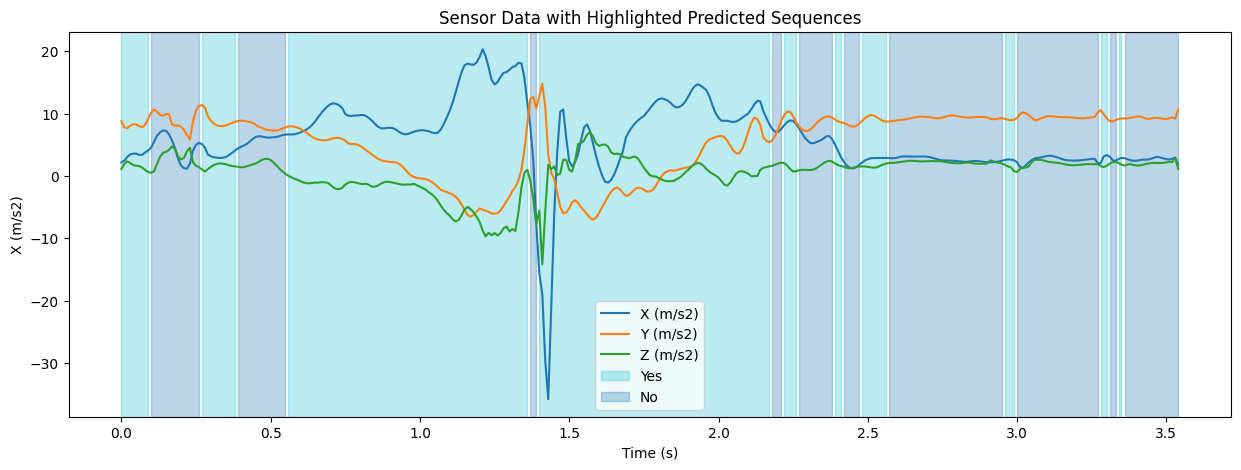

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Your existing code to create new_data and prepare sequences
# (Assuming new_data is already defined as in your example)

# Create sequences
new_sequences = []
sequence_length = 3  # Same as used for training
new_values = new_data[['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']].values
for start in range(0, len(new_values) - sequence_length + 1):
    end = start + sequence_length
    new_sequences.append(new_values[start:end])
X_new = np.array(new_sequences)
print(f'New Sequences shape: {X_new.shape}')

# Make predictions
if X_new.shape[0] > 0:
    predictions = model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_labels = label_encoder.inverse_transform(predicted_classes)
    for i, label in enumerate(predicted_labels):
        print(f'Sequence {i + 1}: Predicted Class = {label}')
else:
    print("Not enough data to create sequences for prediction.")

# Plotting the data and highlighting sequences
# Create a DataFrame to store the predicted labels aligned with the data indices
sequence_indices = np.arange(len(predicted_labels))
data_indices = [np.arange(idx, idx + sequence_length) for idx in sequence_indices]
data_indices = np.concatenate(data_indices)
labels_repeated = np.repeat(predicted_labels, sequence_length)
# Ensure the indices do not go beyond the data length
valid_indices = data_indices < len(new_data)
data_indices = data_indices[valid_indices]
labels_repeated = labels_repeated[valid_indices]

# Create a label array for the entire dataset
label_array = np.full(len(new_data), '', dtype=object)
label_array[data_indices] = labels_repeated

# Find regions where the predicted label remains the same
regions = []
current_label = label_array[0]
start_idx = 0
for idx in range(1, len(label_array)):
    if label_array[idx] != current_label:
        regions.append((start_idx, idx - 1, current_label))
        current_label = label_array[idx]
        start_idx = idx
# Append the last region
regions.append((start_idx, len(label_array) - 1, current_label))

# Assign colors to each unique label
unique_labels = np.unique(predicted_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))
label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

# Plot the sensor data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(new_data['Time (s)'], new_data['X (m/s2)'], label='X (m/s2)')
ax.plot(new_data['Time (s)'], new_data['Y (m/s2)'], label='Y (m/s2)')
ax.plot(new_data['Time (s)'], new_data['Z (m/s2)'], label='Z (m/s2)')


# Highlight the regions
for start_idx, end_idx, label in regions:
    if label == '':
        continue  # Skip if no label
    start_time = new_data['Time (s)'].iloc[start_idx]
    end_time = new_data['Time (s)'].iloc[end_idx]
    ax.axvspan(start_time, end_time, color=label_color_map[label], alpha=0.3, label=label)

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel('Time (s)')
ax.set_ylabel('X (m/s2)')
ax.set_title('Sensor Data with Highlighted Predicted Sequences')
plt.show()


In [ ]:
# Make predictions
if X_new.shape[0] > 0:
    predictions = model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_labels = label_encoder.inverse_transform(predicted_classes)
    for i, label in enumerate(predicted_labels):
        print(f'Sequence {i + 1}: Predicted Class = {label}')
else:
    print("Not enough data to create sequences for prediction.")